In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
from sklearn.preprocessing import LabelEncoder
weather_le=LabelEncoder()
traffic_le=LabelEncoder()
vehicle_le=LabelEncoder()
order_le=LabelEncoder()
df["weather_encoder"]=weather_le.fit_transform(df["Weather_Conditions"])
df["traffic_encoder"]=traffic_le.fit_transform(df["Traffic_Conditions"])
df["vehicle_encoder"]=vehicle_le.fit_transform(df["Vehicle_Type"])
df["order_encoder"]=order_le.fit_transform(df["Order_Priority"])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,weather_encoder,traffic_encoder,vehicle_encoder,order_encoder
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,1,2,2,2
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,0,2,2,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,2,2,1,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,0,1,1,2
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,1,0,1,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Distance','Order_Cost']]=scaler.fit_transform(df[['Distance','Order_Cost']])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,weather_encoder,traffic_encoder,vehicle_encoder,order_encoder
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,0.501852,81.54,1,2,2,2
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,-1.634294,29.02,0,2,2,1
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1.092646,64.17,2,2,1,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,-0.923323,79.23,0,1,1,2
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,-0.779755,2.34,1,0,1,1


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["Delivery_Time"]]=scaler.fit_transform(df[["Delivery_Time"]])

In [6]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,weather_encoder,traffic_encoder,vehicle_encoder,order_encoder
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-1.643130e-16,5.250000,3.738500,3.686500,0.529155,-2.042810e-16,46.616650,1.560000,1.085000,0.965000,1.045000
std,1.002509e+00,2.745027,0.703021,0.697063,0.285625,1.002509e+00,29.361706,1.096546,0.768589,0.810593,0.791268
min,-1.608593e+00,1.000000,2.500000,2.600000,0.000000,-1.688954e+00,1.240000,0.000000,0.000000,0.000000,0.000000
25%,-7.924313e-01,3.000000,3.200000,3.100000,0.304170,-9.013569e-01,21.602500,1.000000,0.000000,0.000000,0.000000
50%,-1.806765e-01,5.000000,3.800000,3.700000,0.550986,-1.925947e-02,47.530000,2.000000,1.000000,1.000000,1.000000
75%,7.325599e-01,8.000000,4.300000,4.300000,0.779586,9.076026e-01,70.245000,3.000000,2.000000,2.000000,2.000000
max,1.963762e+00,10.000000,5.000000,5.000000,1.000000,1.737826e+00,99.740000,3.000000,2.000000,2.000000,2.000000


Delivery_Time                 1.000000
traffic_encoder               0.040023
Order_Cost                   -0.009307
order_encoder                -0.013405
Delivery_Person_Experience   -0.019098
weather_encoder              -0.021580
Customer_Rating              -0.021952
Tip_Amount                   -0.029154
vehicle_encoder              -0.055576
Distance                     -0.075143
Restaurant_Rating            -0.091855
Name: Delivery_Time, dtype: float64


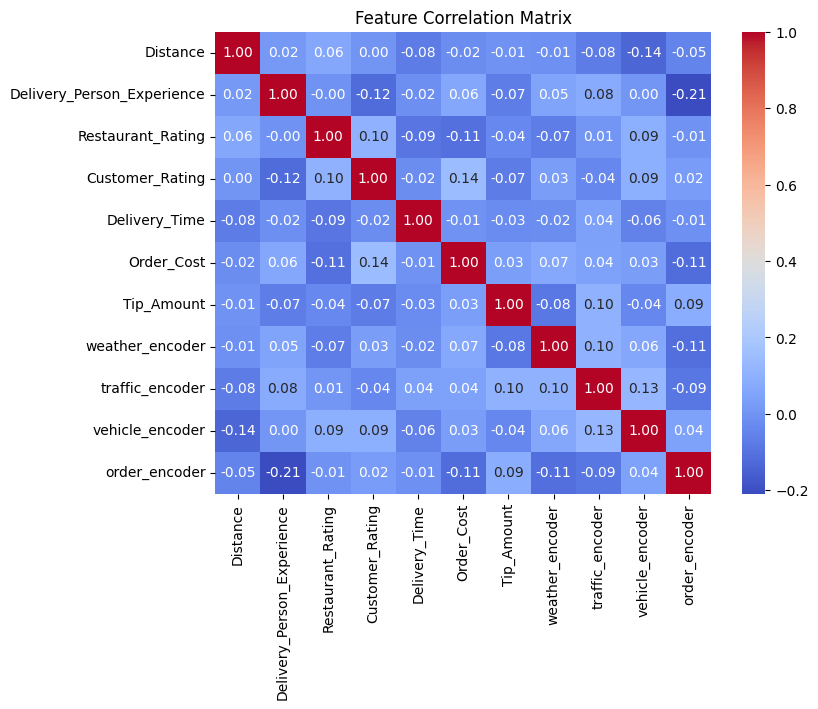

In [7]:
correlation_matrix = df.corr(numeric_only=True)
delivery_corr = correlation_matrix['Delivery_Time'].sort_values(ascending=False)
print(delivery_corr)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


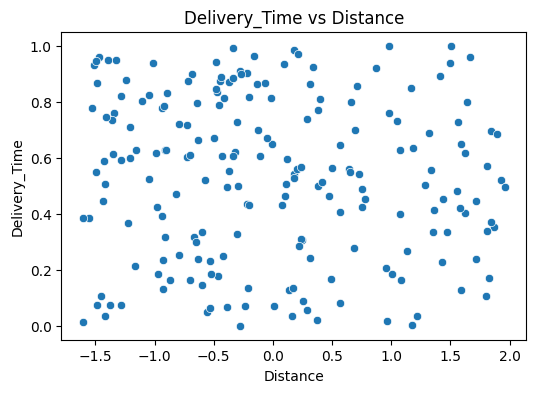

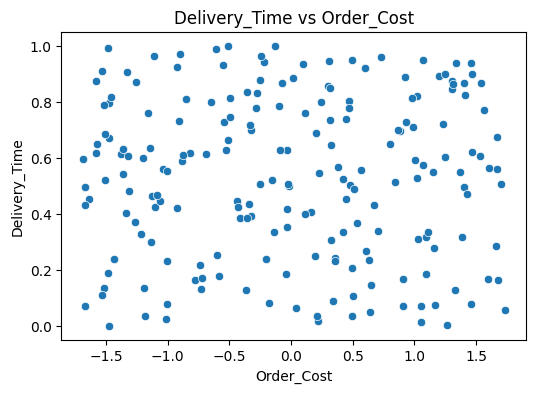

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Distance', y='Delivery_Time')
plt.title("Delivery_Time vs Distance")
plt.show()


plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Order_Cost', y='Delivery_Time')
plt.title("Delivery_Time vs Order_Cost")
plt.show()



In [9]:
df['Customer_Location'] = df['Customer_Location'].str.replace('[()]', '', regex=True).str.strip()
df['Restaurant_Location'] = df['Restaurant_Location'].str.replace('[()]', '', regex=True).str.strip()

# Now split into latitude and longitude
df[['cust_lat', 'cust_lon']] = df['Customer_Location'].str.split(',', expand=True).astype(float)
df[['rest_lat', 'rest_lon']] = df['Restaurant_Location'].str.split(',', expand=True).astype(float)


import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    
    R = 6371.0


    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)


    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = R * c
    return distance


df['Distance_km'] = haversine(df['cust_lat'], df['cust_lon'], df['rest_lat'], df['rest_lon'])


In [10]:
X=df[["Distance","weather_encoder","vehicle_encoder","traffic_encoder","order_encoder"]]
y=df["Delivery_Time"]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
y_predict

array([0.47317512, 0.49046389, 0.51478491, 0.51013712, 0.49345524,
       0.54724769, 0.55750822, 0.53317893, 0.55978954, 0.52948077,
       0.48354554, 0.55430482, 0.51821191, 0.56481356, 0.57233059,
       0.53223723, 0.49919911, 0.51875624, 0.54896906, 0.56360265,
       0.52471192, 0.51426455, 0.49472065, 0.51469215, 0.51848891,
       0.51556792, 0.56183563, 0.56432485, 0.49526668, 0.56398359,
       0.55040926, 0.54293298, 0.53944431, 0.52847501, 0.49317137,
       0.50935116, 0.54012598, 0.54560272, 0.51820028, 0.53949823])

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Squared Error: 0.08342263023883904
Mean Absolute Error: 0.24461416816183762
R² Score: 0.01615438754427234


In [15]:
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > df['Delivery_Time'].median() else 0)
y_clf=df['Delivery_Status']
X_train, X_test, yclf_train, yclf_test = train_test_split(X, y_clf, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression 
lor=LogisticRegression()
lor.fit(X_train,yclf_train)
y_pred=lor.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, confusion_matrix,roc_curve, auc
print(accuracy_score(y_pred,yclf_test))
print(precision_score(y_pred,yclf_test))
print(recall_score(y_pred,yclf_test))
print(f1_score(y_pred,yclf_test))
print(confusion_matrix(y_pred,yclf_test))

0.525
0.47619047619047616
0.5555555555555556
0.5128205128205128
[[11 11]
 [ 8 10]]


In [26]:
y_proba = lor.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(yclf_test, y_proba)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.5137844611528822
